## Why tidy data is useful for exploratory analysis

We **explore** data to find interesting **patterns** by:
- **Visualizing individuals, distributions or aggregations of numerical values** (measures)
- **Splitting by categorical variables (dimensions)**, which can include:
    - separating subsets spatially along an axis, 
    - distinguishing by color,
    - or making separate plots (small multiples) in columns or rows
    
#### Tidy data makes this sort of exploration and analysis easy!

Tidy data's structure of *one variable per column* and *one observation per row* makes it easy to do this exploration by making it simple to aggregate and visualize. These same procedures would be hard if, say, we had multiple observations in a single row, or if the same type of variable were split across multiple columns!

In [1]:
import seaborn as sns

# This makes a white background with grid lines
sns.set_style("whitegrid")

#### The Tips dataset

*The tips dataset is really nice for exploring differences between numerical values and distributions across a population distinguished by lots of categorical variables.* It consists of 244 records/observations of what diners spent and how much they tipped across seven variables:

- **total_bill** – how much the meal cost (decimal, US dollars)
- **tip** – how much they tipped (decimal, US dollars)
- **sex** – gender of diner (Female, Male)
- **smoker** – (Yes, No)
- **day** – day of the week (Thurs, Fri, Sat, Sun)
- **time** – which meal time (Dinner, Lunch)
- **size** – number of people in the dining party (integer, 1-6)

In [2]:
tips = sns.load_dataset("tips")

print("(Rows, Columns) =", tips.shape, "\n")

tips.head(10)

(Rows, Columns) = (244, 7) 



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


### Individual variables & distributions

The most basic form of exploration is to visualize the distribution of values in a numerical column. A histogram is the most classic, but there are some nice alternatives for smaller data sets.

#### Swarm plot 

One interesting alternative is a `swarmplot()`. Points are stacked at their data value rather than overlapping. This doesn't scale very well to huge datasets, but with small data it's nice to see each individual point as a mark.

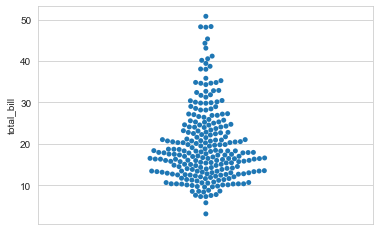

In [3]:
ax = sns.swarmplot(y="total_bill", data=tips)

### *Exercise*

Also try the `stripplot()` to see the contrast.

*Please type exercises instead of copy/paste to help you remember better!*

### Splitting by a categorical variable

Now we can start seeing the power of splitting / subsetting the data (in space and/or color) by the values of a categorial variable. Here we split in space by "day". 

*It's not clear why, but Seaborn's default is to also vary the color for each day, so I'm forcing it to all one color for simplicity.
Colors can be specified through 
[RBGA values](https://matplotlib.org/users/colors.html), or 
[names](https://python-graph-gallery.com/100-calling-a-color-with-seaborn/), or they will be sequentially chosen from the default or specified
[color palette](https://seaborn.pydata.org/tutorial/color_palettes.html).*

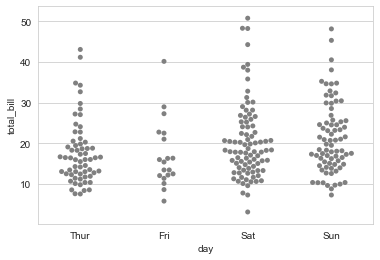

In [5]:
ax = sns.swarmplot(x="day", y="total_bill", color='grey', data=tips)

### *Exercise*

Do the same, but with a `boxplot()`. 

#### Splitting by space and hue

Then we can also split by hue at the same time, either mixed together in the same swarm by default

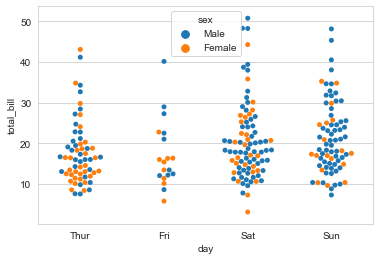

In [6]:
ax = sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

### *Exercise*

Do the same thing, but this time with a `violinplot()`. *Again, type, please*

Try using the `split=True` option/argument

or in separate strips with "dodge"

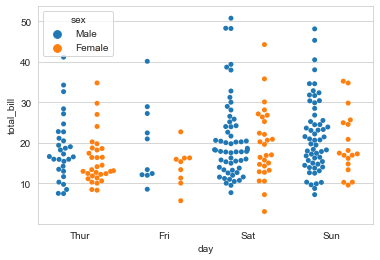

In [7]:
ax = sns.swarmplot(x="day", y="total_bill", hue="sex", dodge=True, data=tips)

### More complex splits

With other plot types we can split and aggregate (here calculating means and confidence intervals) in even more complex ways.

**If the data wasn't tidy, we wouldn't have this flexibility to split or aggregate numerical variables by categorical ones!**

In [8]:
tips['TipPercent'] = 100*tips["tip"]/tips["total_bill"]

smoker_data = tips[tips["smoker"]=='Yes']

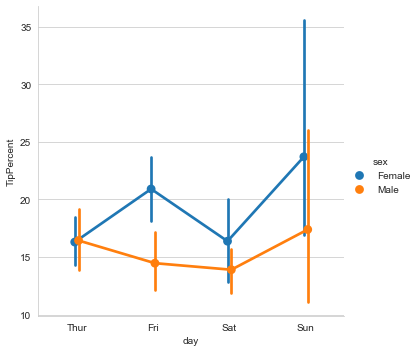

In [9]:
ax_point = sns.catplot(x="day", y="TipPercent", 
                 hue="sex", hue_order=['Female','Male'],
                 kind="point", dodge=True,
                 data=smoker_data)

In [10]:
ax_point.savefig("points.svg")

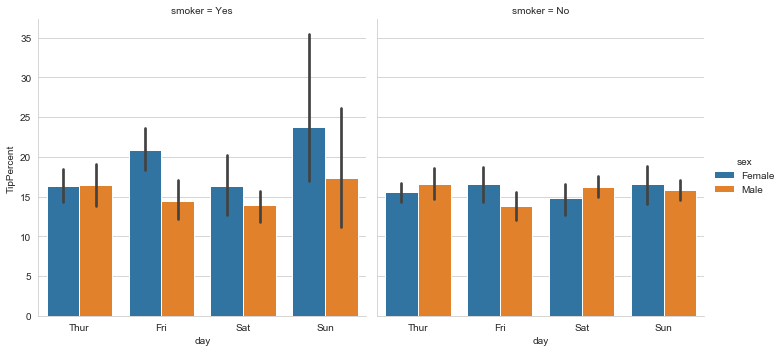

In [11]:
ax = sns.catplot(x="day", y="TipPercent", 
                 hue="sex", hue_order=['Female','Male'],
                 kind="bar",
                 col="smoker",
                 data=tips)

In [12]:
ax.savefig("bars.svg")